#### box 箱形图: 以四分位数查看数值类型数据的分布
- seaborn.catplot(kind='box'): figure-level
- seaborn.boxplot(): axes-level

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(
    context='talk',  # paper, notebook, talk, poster
    style='darkgrid',  # darkgrid, whitegrid, dark, white, ticks
    palette='Set3',  # deep,muted,bright,pastel,dark,colorblind,hls,husl,cm
    rc={
        'figure.figsize': [8, 6]
    }
)

In [3]:
df1 = pd.read_csv('./input/athlete_events.csv')
df2 = pd.read_csv('./input/noc_regions.csv')
df = pd.merge(
    df1, df2,
    on='NOC',
    how='left',
    validate='m:1')

In [4]:
df = df.query("Year>=1984")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148480 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      148480 non-null  int64  
 1   Name    148480 non-null  object 
 2   Sex     148480 non-null  object 
 3   Age     148095 non-null  float64
 4   Height  140921 non-null  float64
 5   Weight  140486 non-null  float64
 6   Team    148480 non-null  object 
 7   NOC     148480 non-null  object 
 8   Games   148480 non-null  object 
 9   Year    148480 non-null  int64  
 10  Season  148480 non-null  object 
 11  City    148480 non-null  object 
 12  Sport   148480 non-null  object 
 13  Event   148480 non-null  object 
 14  Medal   20324 non-null   object 
 15  region  148199 non-null  object 
 16  notes   2228 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 20.4+ MB


In [5]:
li = df['NOC'].value_counts().head(5).index.tolist() + ['CHN']
li

['USA', 'CAN', 'GER', 'ITA', 'FRA', 'CHN']

In [6]:
df = df[df['NOC'].isin(li)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36686 entries, 0 to 271037
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      36686 non-null  int64  
 1   Name    36686 non-null  object 
 2   Sex     36686 non-null  object 
 3   Age     36672 non-null  float64
 4   Height  36172 non-null  float64
 5   Weight  36066 non-null  float64
 6   Team    36686 non-null  object 
 7   NOC     36686 non-null  object 
 8   Games   36686 non-null  object 
 9   Year    36686 non-null  int64  
 10  Season  36686 non-null  object 
 11  City    36686 non-null  object 
 12  Sport   36686 non-null  object 
 13  Event   36686 non-null  object 
 14  Medal   7262 non-null   object 
 15  region  36686 non-null  object 
 16  notes   0 non-null      object 
dtypes: float64(3), int64(2), object(12)
memory usage: 5.0+ MB


<Axes: xlabel='NOC', ylabel='Age'>

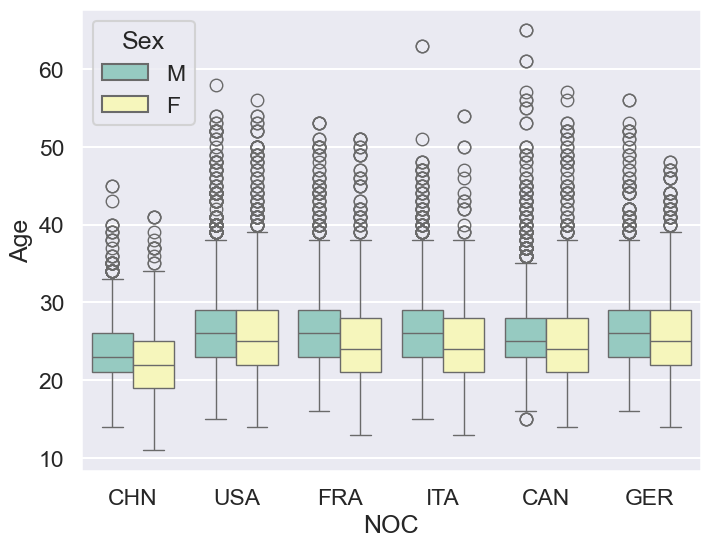

In [7]:
sns.boxplot(
    x='NOC',
    y='Age',
    hue='Sex',
    data=df
)

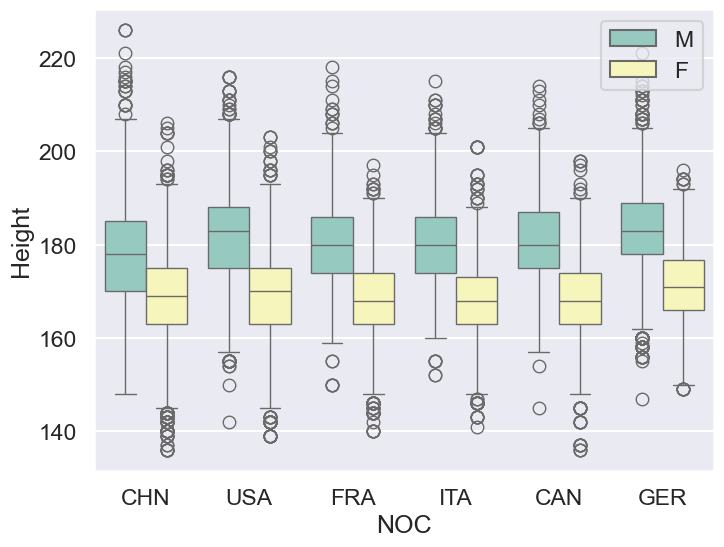

In [8]:
sns.boxplot(
    x='NOC',
    y='Height',
    hue='Sex',
    data=df
)
plt.legend(loc='upper right')

<Axes: xlabel='Height', ylabel='NOC'>

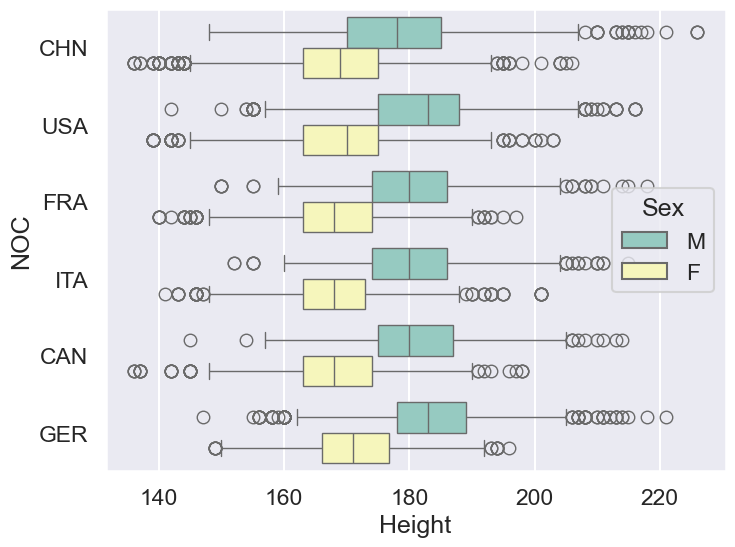

In [9]:
sns.boxplot(
    x='Height',
    y='NOC',
    hue='Sex',
    data=df
)

<Axes: >

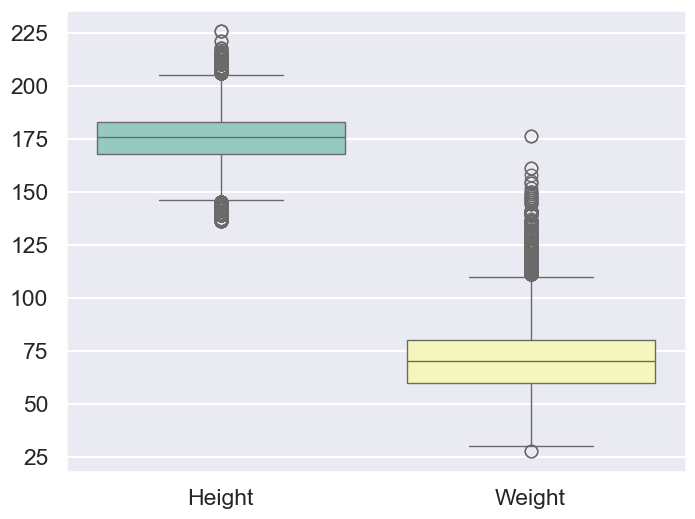

In [10]:
sns.boxplot(
    data=df[['Height', 'Weight', 'NOC']]
)